# Quantum State preparation (QSP) (DRAFT)

In [48]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library.standard_gates import RYGate, RZGate
from qiskit.transpiler.passes import Decompose
import matplotlib.pyplot as plt
import math
import numpy as np

## Quantum States

The n-qubit quantum state ($\ket{\psi}$) can be described as a linear combination of $2^n$ orthonormal basis vectors where
$$\ket{\psi} = \sum_{x{\in}{\{0,1}\}^n}c_x\ket{x}$$ and $$\sum_{x{\in}{\{0,1}\}^n}|c_x|^2 =1, $$ such that $\ket{x}{\in}{\{0,1^n}\}$ are basis states and $c_x\in\mathbb{C}$ are amplitudes that represent the probability of observing $\ket{x}$ after a 

measurement.

## Quantum Gates

Transitions between quantum states can be represented by quantum gates. Unitary matrices are operators, or quantum gates, 

where a set of all n-qubit gates is $\mathcal{U}(2^n)$. Rotations along $Y$ ($R_y$) are single-qubit unitaries that redistribute the 

amplitude between $\ket{0}$ and  $\ket{1}$, while a $Z$ rotation ($R_z$) introduces a phase shift between $\ket{0}$ and  $\ket{1}$. 

$R_y$ and $R_z$ are written below in term of the rotational angle $\theta\in [0,2\pi]$:


$R_y(\theta)$ = $\left(
\begin{array}{c c}
 \text{$cos{\frac{\theta}{2}}$} & \text{$ - sin{\frac{\theta}{2}}$} \\
 \text{$sin{\frac{\theta}{2}}$} & \text{$cos{\frac{\theta}{2}}$} \\
\end{array}
\right)
$
and 
$R_z(\theta)$ = $\left(
\begin{array}{c c}
 \text{$exp{\frac{-i\theta}{2}}$} & \text{0} \\
 \text{0} & \text{$exp{\frac{i\theta}{2}}$} \\
\end{array}
\right)
$

A single qubit operator that maps $\alpha\ket{0}$ and $\beta\ket{1}$ to $\beta\ket{0}$ and $\alpha\ket{1}$ is the Pauli-X ($\sigma_x$) matrix. 

Similarly, the transition $\alpha\ket{00}$+$\beta\ket{01}$+$\gamma\ket{10}$+$\delta\ket{11}$ to

$\alpha\ket{00}$+$\beta\ket{01}$+$\gamma\ket{11}$+$\delta\ket{10}$ can be described by CNOT = $\mathbb{1}\mod\sigma_x$, where $\sigma_x$ = $\left(
\begin{array}{c c}
 \text{0} & \text{1} \\
 \text{1} & \text{0} \\
\end{array}
\right)
$ and CNOT = $\left(
\begin{array}{c c c c}
 \text{1} & \text{0} & \text{0} & \text{0} \\
 \text{0} & \text{1} & \text{0} & \text{0} \\
 \text{0} & \text{0} & \text{0} & \text{1} \\
 \text{0} & \text{0} & \text{1} & \text{0} \\
\end{array}
\right)$.

## Quantum State Preparation

Quantum state preparation (QSP) uses $\mathcal{l}$ number of quantum gates in a quantum circuit ($U$) to bring the ground state $\ket{0}$ 

to the desired (or target) state $\ket{\psi}$, such that $\ket{\psi}$ = $U_l\ket{0})$. $U$ must imput each unique amplitude $c_x$ via a rotation such that $$\ket{\psi} = \sum_{x=0}^{2^n-1}c_x\ket{x}.$$ Thus, preparating an arbitary state $\ket{\psi}$ is "costly." 

Ideally, QSP implements the minimal number of non-Clifford gates and ancilla qubits with as few additional qubits as possible.

### $n = 3$
### Consider the target state $\ket{\psi}_i$ 

$$\ket{\psi}_i = \sqrt\frac{2}{8}\ket{000} - \sqrt\frac{1}{8}\ket{100} + \sqrt\frac{1}{8}\ket{010} + \sqrt\frac{1}{8}\ket{101} + \sqrt\frac{1}{8}\ket{011} + \sqrt\frac{2}{8}\ket{111} $$

for three qubits $\ket{q_0q_1q_2}$.

In [49]:
#binary
def make_code(n:int)->np.array:
    
    make_list = []
  
    for i in range(1 << n):
        binary_list = bin(i ^ (i >> 1))[2::]
        binary_list = binary_list.zfill(n)
        make_list.append(binary_list)

    return np.asarray(make_list)

make_code(3)

array(['000', '001', '011', '010', '110', '111', '101', '100'],
      dtype='<U3')

In [50]:
#get phases
def get_phases(state: np.array) -> np.array:
    
    omega_phases = np.empty(len(state), dtype=float)

    for st in range(len(state)):
        omega_phases[st] = cmath.phase(state[st])

    return omega_phases

In [51]:
#get angles
def get_angles(state_0): 
    
        angles = []
        newstate = []
        for j1 in range(len(state_0)//2):
            angles.append(2*np.arccos(state_0[2*j1]/np.sqrt(state_0[2*j1]**2+state_0[2*j1+1]**2)))
            newstate.append(np.sqrt(state_0[2*j1]**2+state_0[2*j1+1]**2))
            
        return angles, newstate

In [52]:
#get matrix with basis states
def g(i) :  
    return i ^ (i >> 1)
def get_matrix_entry(i:int, j:int, k:int)-> int:
 

    bitwise_dot_product = bin(j&g(i)).count('1')
    m_ij = (2 ** (-k)) * (-1) ** bitwise_dot_product
  
    return m_ij


In [53]:
n = 3
psi = (1 + np.arange(2**n)) / np.linalg.norm(1 + np.arange(2**n))
psi
#qc=make_circuit(psi)
#qc.draw()

array([0.070014  , 0.14002801, 0.21004201, 0.28005602, 0.35007002,
       0.42008403, 0.49009803, 0.56011203])

### Build the quantum circuit

## Simple Example

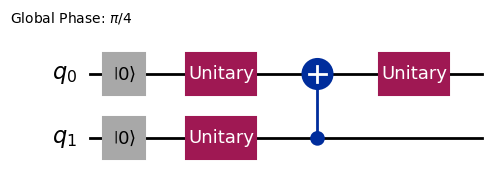

In [7]:
qc = QuantumCircuit(2)
initial_state = np.array([1, 1, 0, 1], dtype=float)
initial_state /= np.linalg.norm(initial_state)
qc.initialize(initial_state)
qc.decompose().decompose().decompose().decompose().draw("mpl")

In [8]:
circuit = QuantumCircuit(4)
c3ry = RYGate(0.12).control(3)
circuit.append(c3ry, [0, 1, 2, 3])
circuit.draw()

q_0: ─────■──────
          │      
q_1: ─────■──────
          │      
q_2: ─────■──────
     ┌────┴─────┐
q_3: ┤ Ry(0.12) ├
     └──────────┘

In [9]:
 qr = QuantumRegister(4)
control_qubits = qr[:3]
target_qubit = qr[3]
circuit = QuantumCircuit(qr)
circuit.mcry(0.12, control_qubits, target_qubit)
circuit.draw()

┌───┐»
q0_0: ──────────────────────────────────────────────────────────────┤ X ├»
                       ┌───┐                  ┌───┐                 └─┬─┘»
q0_1: ─────────────────┤ X ├────────■─────────┤ X ├────────■──────────■──»
                       └─┬─┘        │         └─┬─┘        │             »
q0_2: ────────■──────────■──────────┼───────────■──────────┼─────────────»
      ┌───────┴───────┐     ┌───────┴────────┐     ┌───────┴───────┐     »
q0_3: ┤ U(0.03,0,0,0) ├─────┤ U(-0.03,0,0,0) ├─────┤ U(0.03,0,0,0) ├─────»
      └───────────────┘     └────────────────┘     └───────────────┘     »
«                        ┌───┐                 ┌───┐                  ┌───┐»
«q0_0: ────────■─────────┤ X ├────────■────────┤ X ├────────■─────────┤ X ├»
«              │         └─┬─┘        │        └─┬─┘        │         └─┬─┘»
«q0_1: ────────┼───────────┼──────────┼──────────■──────────┼───────────┼──»
«              │           │          │                     │           │  »
«q0_2: ────────┼───────────■──────────┼─────────────────────┼───────────■──»
«      ┌───────┴────────┐     ┌───────┴───────┐     ┌───────┴────────┐     »
«q0_3: ┤ U(-0.03,0,0,0) ├─────┤ U(0.03,0,0,0) ├─────┤ U(-0.03,0,0,0) ├─────»
«      └────────────────┘     └───────────────┘     └────────────────┘     »
«                       
«q0_0: ────────■────────
«              │        
«q0_1: ────────┼────────
«              │        
«q0_2: ────────┼────────
«      ┌───────┴───────┐
«q0_3: ┤ U(0.03,0,0,0) ├
«      └───────────────┘

## References

McArdle, S., Gilyén, A. and Berta, M., 2022. Quantum state preparation without coherent arithmetic. arXiv preprint arXiv:2210.14892.

Mottonen, M., Vartiainen, J.J., Bergholm, V. and Salomaa, M.M., 2004. Transformation of quantum states using uniformly controlled rotations. arXiv preprint quant-ph/0407010.

Mozafari, F., Riener, H., Soeken, M. and De Micheli, G., 2021. Efficient boolean methods for preparing uniform quantum states. IEEE Transactions on Quantum Engineering, 2, pp.1-12.

Shende, V.V., Bullock, S.S. and Markov, I.L., 2005, January. Synthesis of quantum logic circuits. In Proceedings of the 2005 Asia and South Pacific Design Automation Conference (pp. 272-275).

Wang, H., Tan, D.B. and Cong, J., 2024, October. Quantum State Preparation Circuit Optimization Exploiting Don't Cares. In Proceedings of the 43rd IEEE/ACM International Conference on Computer-Aided Design (pp. 1-9).